In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('Olympic_Swimming_Results_1912to2020.csv')
df = df.dropna(how="any")
df

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4353,Stockholm,1912,4x100,Freestyle,1,Women,AUT,"Margarete Adler, Bertha Zahourek, Josephine St...",00:06:17.000000,4
4355,Stockholm,1912,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",00:10:11.200000,1
4356,Stockholm,1912,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",00:10:20.200000,2
4357,Stockholm,1912,4x200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",00:10:28.600000,3


In [3]:
def to_seconds(time_str):
    # Handle NaN values and "Didnt qualify"
    if pd.isna(time_str) or time_str == "Disqualified" or time_str == "Did not start" or  time_str == "Did not finish":
        return None    
    # If it's already a number, return it as a float
    if isinstance(time_str, (int, float)):
        return float(time_str)
    
    # Convert to string if it's not already
    time_str = str(time_str)
    
    # Remove any non-digit characters except colon and period
    time_str = re.sub(r'[^\d:.]', '', time_str)
    
    # Split the time string by colon
    parts = time_str.split(':')
    
    if len(parts) == 1:
        # Format: seconds.milliseconds (e.g., 51.98)
        return float(parts[0])
    
    elif len(parts) == 2:
        # Format: minutes:seconds.milliseconds (e.g., 14:39.7)
        minutes, seconds = parts
        return float(minutes) * 60 + float(seconds)
    
    elif len(parts) == 3:
        # Format: hours:minutes:seconds.milliseconds
        hours, minutes, seconds = parts
        return float(hours) * 3600 + float(minutes) * 60 + float(seconds)
    
    else:
        # Unexpected format
        print(f"Unexpected time format: {time_str}")
        return None

In [4]:
df['Results'] = df['Results'].apply(to_seconds)
df

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52.00,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.30,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4353,Stockholm,1912,4x100,Freestyle,1,Women,AUT,"Margarete Adler, Bertha Zahourek, Josephine St...",377.00,4
4355,Stockholm,1912,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",611.20,1
4356,Stockholm,1912,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",620.20,2
4357,Stockholm,1912,4x200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",628.60,3


In [5]:
df_rename = df.loc[df["Stroke"] == "Freestyle"]
df_rename["Distance (in meters)"].value_counts()

Distance (in meters)
100m     390
400m     386
4x100    265
200m     224
4x200    219
1500m    206
50m      144
800m     120
Name: count, dtype: int64

In [6]:
popularity = df["Stroke"].value_counts()
popularity

Stroke
Freestyle            1954
Breaststroke          614
Backstroke            602
Butterfly             495
Individual medley     424
Medley                228
Name: count, dtype: int64

In [7]:
df_gold = df.loc[df["Rank"] == 1]
series_gold = df_gold["Team"].value_counts()
country_gold = pd.DataFrame(series_gold).head(10)
country_gold

,count
Team,
USA,237
AUS,61
GDR,30
HUN,25
JPN,24
NED,17
CHN,14
GER,13
URS,11


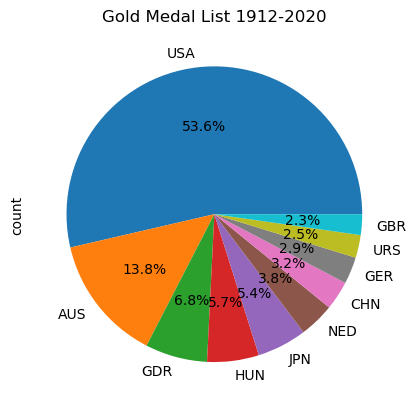

In [8]:
country_gold.plot(kind="pie", y="count", legend=False, autopct='%1.1f%%',title="Gold Medal List 1912-2020")
plt.show()

In [9]:
series = df["Team"].value_counts()
series
country_df = pd.DataFrame(series)
country_top= country_df.head(10)
country_top

,count
Team,
USA,888
AUS,445
GBR,286
JPN,246
GER,225
CAN,198
HUN,173
GDR,144
SWE,137


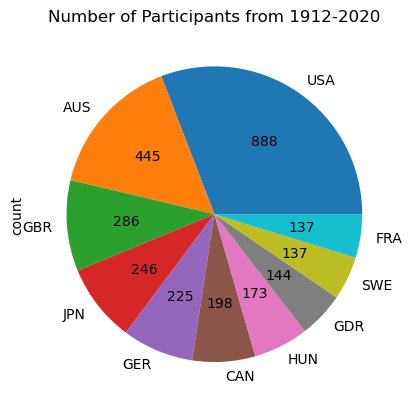

In [10]:
country_top.plot(kind="pie", y="count", autopct=lambda pct: f"{pct*sum(country_top["count"])/100:.0f}", legend=False, title = "Number of Participants from 1912-2020")
plt.show()
# plt.legend(loc="lower right", autopct='%1.1f%%'legend=False,

                # plot = df.plot.pie(y='hours', title="Title", legend=False, \
                #    autopct='%1.1f%%', explode=(0, 0, 0.1), \
                #    shadow=True, startangle=0)

In [11]:
df = df.set_index("Year")
df

,Location,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
Year,,,,,,,,,
2020,Tokyo,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
2020,Tokyo,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52.00,2
2020,Tokyo,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
2020,Tokyo,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.30,4
2020,Tokyo,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...
1912,Stockholm,4x100,Freestyle,1,Women,AUT,"Margarete Adler, Bertha Zahourek, Josephine St...",377.00,4
1912,Stockholm,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",611.20,1
1912,Stockholm,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",620.20,2


In [12]:
popularity_gold = df_gold["Stroke"].value_counts()
popularity_gold


Stroke
Freestyle            245
Backstroke            76
Breaststroke          72
Butterfly             61
Individual medley     54
Medley                23
Name: count, dtype: int64

In [13]:
popularity_gold_df= pd.DataFrame(popularity_gold)
popularity_gold_df

,count
Stroke,
Freestyle,245
Backstroke,76
Breaststroke,72
Butterfly,61
Individual medley,54
Medley,23


In [14]:
popularity_df = pd.DataFrame(popularity)
popularity_df


,count
Stroke,
Freestyle,1954
Breaststroke,614
Backstroke,602
Butterfly,495
Individual medley,424
Medley,228


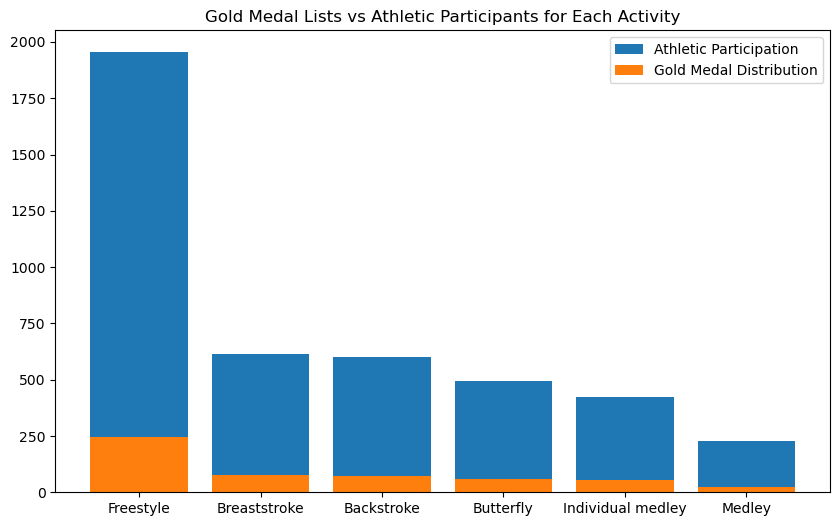

In [15]:
plt.figure(figsize=(10, 6))
plt.title("Gold Medal Lists vs Athletic Participants for Each Activity")
plt.bar(popularity_df.index, popularity_df["count"], label="Athletic Participation")
plt.bar(popularity_df.index, popularity_gold_df["count"],label="Gold Medal Distribution")
plt.legend(loc="best")
plt.show()

In [16]:
df_part = df.groupby(["Year", "Stroke"])[["Results"]].count()
df_part

Results
Year Stroke                    
1912 Backstroke               5
     Breaststroke             8
     Freestyle               25
1920 Backstroke               4
     Breaststroke            10
...                         ...
2020 Backstroke              32
     Breaststroke            32
     Butterfly               32
     Freestyle              104
     Individual medley       24

[122 rows x 1 columns]

In [17]:
df_unstacked = df_part['Results'].unstack(level='Stroke')
df_unstacked

Stroke,Backstroke,Breaststroke,Butterfly,Freestyle,Individual medley,Medley
Year,,,,,,
1912,5.0,8.0,NaN,25.0,NaN,NaN
1920,4.0,10.0,NaN,23.0,NaN,NaN
1924,10.0,12.0,NaN,34.0,NaN,NaN
1928,13.0,12.0,NaN,42.0,NaN,NaN
1932,12.0,13.0,NaN,42.0,NaN,NaN
1936,14.0,14.0,NaN,51.0,NaN,NaN
1948,16.0,16.0,NaN,55.0,NaN,NaN
1952,15.0,16.0,NaN,56.0,NaN,NaN
1956,16.0,15.0,16.0,56.0,NaN,NaN


In [18]:
df_unstacked.columns

Index(['Backstroke', 'Breaststroke', 'Butterfly', 'Freestyle',
       'Individual medley', 'Medley'],
      dtype='object', name='Stroke')

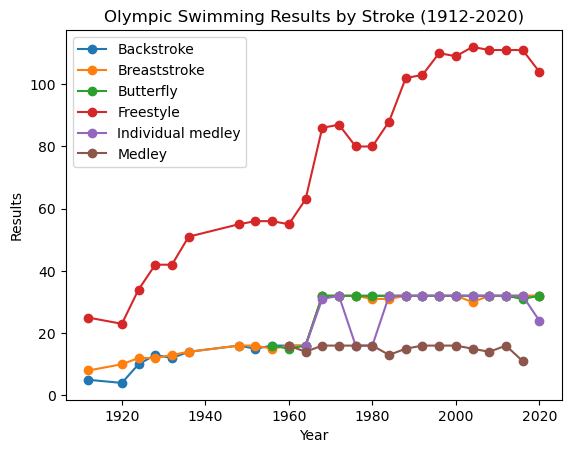

In [19]:
for column in df_unstacked.columns:
    plt.plot(df_unstacked.index, df_unstacked[column], marker='o', label=column)   
plt.legend()
plt.title('Olympic Swimming Results by Stroke (1912-2020)')
plt.xlabel('Year')
plt.ylabel('Results')
plt.show()

In [20]:
df_rename = df.loc[df["Stroke"] == "Freestyle"]
df_rename["Distance (in meters)"].value_counts()

Distance (in meters)
100m     390
400m     386
4x100    265
200m     224
4x200    219
1500m    206
50m      144
800m     120
Name: count, dtype: int64

In [43]:
df_back = df.loc[df["Stroke"] == "Butterfly"]
df_back["Distance (in meters)"].value_counts()

Distance (in meters)
200m    248
100m    247
Name: count, dtype: int64

In [48]:
groupby_trend = df_gold.loc[(df_gold["Gender"] == "Men")&(df_gold["Distance (in meters)"] == "100m")&(df_gold["Stroke"] == "Backstroke")]
groupby_trend

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
224,Rio,2016,100m,Backstroke,0,Men,USA,Ryan Murphy,51.97,1
480,London,2012,100m,Backstroke,0,Men,USA,Matt Grevers,52.16,1
736,Beijing,2008,100m,Backstroke,0,Men,USA,Aaron Peirsol,52.54,1
992,Athens,2004,100m,Backstroke,0,Men,USA,Aaron Peirsol,54.06,1
1248,Sydney,2000,100m,Backstroke,0,Men,USA,Lenny Krayzelburg,53.72,1
1504,Atlanta,1996,100m,Backstroke,0,Men,USA,Jeff Norman Rouse,54.10,1
1760,Barcelona,1992,100m,Backstroke,0,Men,CAN,Mark Tewksbury,53.98,1
2008,Seoul,1988,100m,Backstroke,0,Men,JPN,Daichi Suzuki,55.05,1
2256,Angeles,1984,100m,Backstroke,0,Men,USA,Richard John Carey,55.79,1


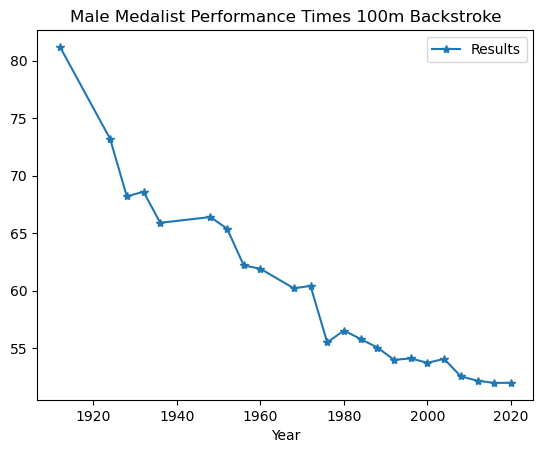

In [50]:
groupby_trend.plot(kind="line", x="Year", y= "Results", marker="*", title="Male Medalist Performance Times 100m Backstroke") 
plt.show()